# Contest Performance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import datetime

In [2]:
contest21=pd.read_csv('2021_contest.csv')

In [3]:
sub=pd.read_excel('b2c_sub.xlsx')

## 2021

In [4]:
contest21['Email Address']=contest21['Email Address'].str.lower()

In [5]:
contest21.head()

,Contest,Name,Email Address,Referrer,Campaign,Created At
0,Orcé X LePrix Giveaway,Madeleine Pearl,mmueller30@yahoo.com,NaN,66588840d0-EMAIL_CAMPAIGN_2020_01_16_05_12_COP...,04/27/2021 02:52AM
1,Orcé X LePrix Giveaway,Soraya Brewington,beemie82@hotmail.com,NaN,NaN,04/27/2021 02:38AM
2,Orcé X LePrix Giveaway,Sam Latten,sylatten@gmail.com,https://leprix.com/contests/0b3f0b5f-1dbc-497f...,NaN,04/27/2021 02:27AM
3,Orcé X LePrix Giveaway,Lucy Garcia,mslucy310@gmail.com,https://www.contestgirl.com/,NaN,04/27/2021 02:22AM
4,Orcé X LePrix Giveaway,Jessie Li,cannolib1@yahoo.com,https://l.instagram.com/?u=https%3A%2F%2Flepri...,orce_lpxorce-giveaway,04/27/2021 02:16AM


In [6]:
contest21['Contest'].value_counts()

The Glow Up Giveaway           7479
The Spring Refresh Giveaway    5144
Orcé X LePrix Giveaway         3036
Name: Contest, dtype: int64

In [7]:
sub['Email Address']=sub['Email Address'].str.lower()
em_list=list(sub['Email Address'])

In [8]:
contest21['subscribed']='N'
contest21.loc[contest21['Email Address'].isin(em_list), 'subscribed']='Y'

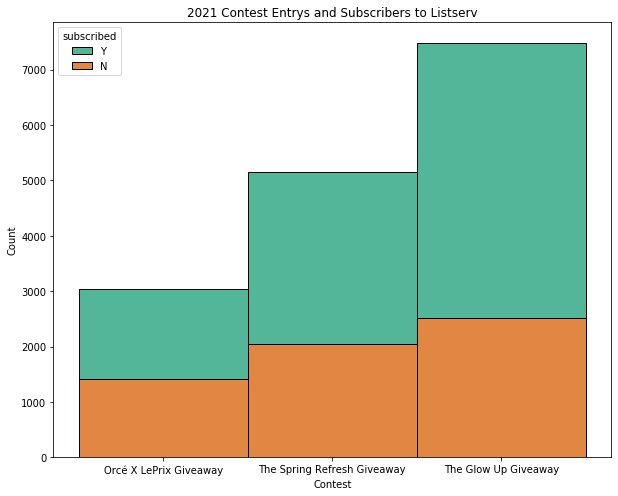

In [9]:
plt.figure(figsize=(10,8))
sns.histplot(x='Contest', hue='subscribed', data=contest21, multiple='stack', palette='Dark2')
plt.title('2021 Contest Entrys and Subscribers to Listserv')
plt.show()

In [10]:
contest21=contest21.merge(sub[['Email Address', 'OPTIN_TIME']], how='left')
contest21.head()

,Contest,Name,Email Address,Referrer,Campaign,Created At,subscribed,OPTIN_TIME
0,Orcé X LePrix Giveaway,Madeleine Pearl,mmueller30@yahoo.com,NaN,66588840d0-EMAIL_CAMPAIGN_2020_01_16_05_12_COP...,04/27/2021 02:52AM,Y,2021-04-27 02:52:14
1,Orcé X LePrix Giveaway,Soraya Brewington,beemie82@hotmail.com,NaN,NaN,04/27/2021 02:38AM,N,NaN
2,Orcé X LePrix Giveaway,Sam Latten,sylatten@gmail.com,https://leprix.com/contests/0b3f0b5f-1dbc-497f...,NaN,04/27/2021 02:27AM,N,NaN
3,Orcé X LePrix Giveaway,Lucy Garcia,mslucy310@gmail.com,https://www.contestgirl.com/,NaN,04/27/2021 02:22AM,N,NaN
4,Orcé X LePrix Giveaway,Jessie Li,cannolib1@yahoo.com,https://l.instagram.com/?u=https%3A%2F%2Flepri...,orce_lpxorce-giveaway,04/27/2021 02:16AM,Y,2021-04-27 02:16:08


In [11]:
contest21[['Created At', 'OPTIN_TIME']]=contest21[['Created At', 'OPTIN_TIME']].apply(pd.to_datetime)

In [12]:
contest21['time_to_sub']=(contest21['OPTIN_TIME']-contest21['Created At']).dt.days

In [13]:
(contest21.groupby('Contest')['subscribed']
 .value_counts()/contest21.groupby('Contest')['subscribed']
 .count()*100)

Contest                      subscribed
Orcé X LePrix Giveaway       Y             53.194993
                             N             46.805007
The Glow Up Giveaway         Y             66.278914
                             N             33.721086
The Spring Refresh Giveaway  Y             60.108865
                             N             39.891135
Name: subscribed, dtype: float64

% subscribed for each giveaway

In [14]:
(contest21[contest21['time_to_sub']>=0].groupby('Contest')['subscribed'].value_counts())

Contest                      subscribed
Orcé X LePrix Giveaway       Y               37
The Glow Up Giveaway         Y             3213
The Spring Refresh Giveaway  Y             2061
Name: subscribed, dtype: int64

In [15]:
contest21.groupby('Contest')['Created At'].min()

Contest
Orcé X LePrix Giveaway        2021-04-19 09:32:00
The Glow Up Giveaway          2021-01-27 22:44:00
The Spring Refresh Giveaway   2021-03-22 09:23:00
Name: Created At, dtype: datetime64[ns]

In [53]:
order=pd.read_csv('2021orders.csv')

In [54]:
order['Buyer Email']=order['Buyer Email'].str.lower()

In [55]:
order.columns

Index(['Order ID', 'Reference', 'Buyer ID', 'Seller ID', 'Item ID',
       'Markdown ID', 'Buyer', 'Buyer Email', 'Seller', 'Seller Email', 'Item',
       'Item Creation', 'Color', 'Brand', 'Category', 'Parent Category',
       'Subtotal', 'Shipping', 'Refunded', 'Promo Code', 'Promo Value',
       'Markdown', 'Credit', 'Tax', 'Total', 'Payment Type',
       'Credit Card (Stripe) ID', 'Paypal Transaction ID', 'Affirm Charge ID',
       'Seller Fee', 'Seller Label', 'Seller Shipping', 'Seller Refunded',
       'Seller Cashout', 'Seller Promo', 'Billing Name', 'Billing Line 1',
       'Billing Line 2', 'Billing City', 'Billing Region', 'Billing Postcode',
       'Billing Country', 'Buyer Shipping Name', 'Buyer Shipping Line 1',
       'Buyer Shipping Line 2', 'Buyer Shipping City', 'Buyer Shipping Region',
       'Buyer Shipping Postcode', 'Buyer Shipping Country', 'Phone',
       'Seller Shipping Name', 'Seller Shipping Line 1',
       'Seller Shipping Line 2', 'Seller Shipping City',
 

In [56]:
order[['Modified_At','Created At', 'Pending Until']]=order[['Modified_At','Created At', 'Pending Until']].apply(pd.to_datetime)

In [57]:
orc_email=list(contest21[contest21['Contest']=='Orcé X LePrix Giveaway']['Email Address'])

In [58]:
orce=order.loc[(order['Created At']>datetime.datetime(2021,4,19)) & (order['Created At']<datetime.datetime(2021,7,19))]
orce=orce[orce['Buyer Email'].isin(orc_email)]
print('GMV from Orcé X LePrix Giveaway: ${:.2f}'.format(orce['Subtotal'].sum()))

GMV from Orcé X LePrix Giveaway: $10000.86


In [59]:
ocost=434+(.12*orce['Subtotal'].sum())
(orce['Subtotal'].sum()-(ocost))/(ocost)*100

512.0090824129101

In [60]:
glow_email=list(contest21[contest21['Contest']=='The Glow Up Giveaway']['Email Address'])
glow=order.loc[(order['Created At']>datetime.datetime(2021,1,27)) & (order['Created At']<datetime.datetime(2021,4,27))]
glow=glow[glow['Buyer Email'].isin(glow_email)]
print('GMV from The Glow Up Giveaway: ${:.2f}'.format(glow['Subtotal'].sum()))

GMV from The Glow Up Giveaway: $24022.13


In [61]:
gcost=1220+(.12*glow['Subtotal'].sum())
(glow['Subtotal'].sum()-(gcost))/(gcost)*100

485.526360048355

In [62]:
spr_email=list(contest21[contest21['Contest']=='The Spring Refresh Giveaway']['Email Address'])
spr=order.loc[(order['Created At']>datetime.datetime(2021,3,22)) & (order['Created At']<datetime.datetime(2021,6,22))]
spr=spr[spr['Buyer Email'].isin(spr_email)]
print('GMV from The Spring Refresh Giveaway: ${:.2f}'.format(spr['Subtotal'].sum()))

GMV from The Spring Refresh Giveaway: $10370.36


In [63]:
scost=878+(.12*spr['Subtotal'].sum())
(spr['Subtotal'].sum()-(scost))/(scost)*100

388.60483050853856

In [64]:
act_em=list(order['Buyer Email'])
contest21['active_buyer']='N'
contest21.loc[contest21['Email Address'].isin(act_em),'active_buyer']='Y'
contest21.groupby('Contest')['active_buyer'].value_counts()/contest21.groupby('Contest')['active_buyer'].count()*100

Contest                      active_buyer
Orcé X LePrix Giveaway       N               99.209486
                             Y                0.790514
The Glow Up Giveaway         N               99.705843
                             Y                0.294157
The Spring Refresh Giveaway  N               99.611198
                             Y                0.388802
Name: active_buyer, dtype: float64

In [70]:
counts_act=contest21.groupby('Contest')['active_buyer'].value_counts()
counts_act

Contest                      active_buyer
Orcé X LePrix Giveaway       N               3012
                             Y                 24
The Glow Up Giveaway         N               7457
                             Y                 22
The Spring Refresh Giveaway  N               5124
                             Y                 20
Name: active_buyer, dtype: int64

**CONVERSION RATES TO ACTIVE BUYERS**

In [71]:
print('number of active buyers from Orcé X LePrix Giveaway: {}'.format(counts_act[1]))
print('number of active buyers from The Glow Up Giveaway: {}'.format(counts_act[3]))
print('number of active buyers from The Spring Refresh Giveaway: {}'.format(counts_act[5]))

number of active buyers from Orcé X LePrix Giveaway: 24
number of active buyers from The Glow Up Giveaway: 22
number of active buyers from The Spring Refresh Giveaway: 20


## 2020

In [73]:
contest20=pd.read_csv('2020_contest.csv')
contest20['Email Address']=contest20['Email Address'].str.lower()

In [74]:
contest20['subscribed']='N'
contest20.loc[contest20['Email Address'].isin(em_list), 'subscribed']='Y'

In [75]:
contest20.loc[contest20['Contest']=='LePrix X U Beauty Giveaway','Contest']='LePrix X U Beauty'

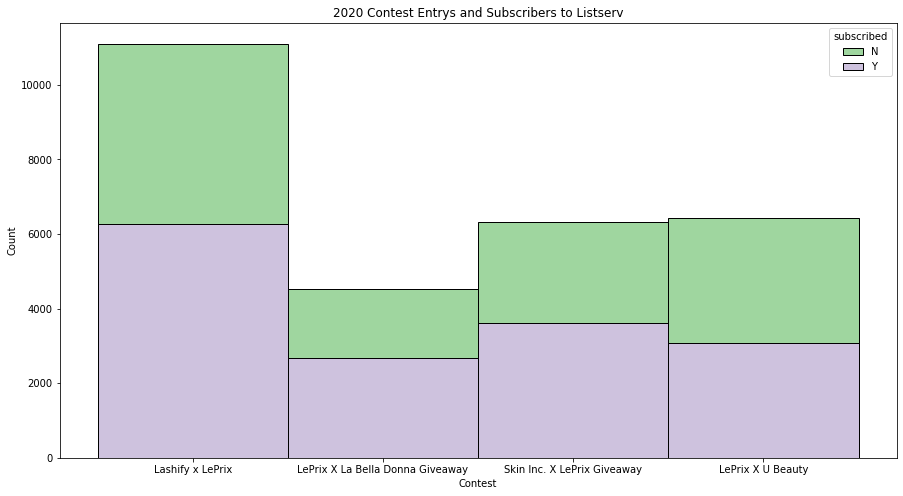

In [76]:
plt.figure(figsize=(15,8))
sns.histplot(x='Contest', hue='subscribed', data=contest20, multiple='stack', palette='Accent')
plt.title('2020 Contest Entrys and Subscribers to Listserv')
plt.show()

In [77]:
(contest20.groupby('Contest')['subscribed']
 .value_counts()/contest20.groupby('Contest')['subscribed']
 .count()*100)

Contest                           subscribed
Lashify x LePrix                  Y             56.434039
                                  N             43.565961
LePrix X La Bella Donna Giveaway  Y             59.210236
                                  N             40.789764
LePrix X U Beauty                 N             51.908397
                                  Y             48.091603
Skin Inc. X LePrix Giveaway       Y             56.953224
                                  N             43.046776
Name: subscribed, dtype: float64

In [78]:
contest20=contest20.merge(sub[['Email Address', 'OPTIN_TIME']], how='left')
contest20[['Created At', 'OPTIN_TIME']]=contest20[['Created At', 'OPTIN_TIME']].apply(pd.to_datetime)
contest20['time_to_sub']=(contest20['OPTIN_TIME']-contest20['Created At']).dt.days

In [79]:
len(contest20[contest20['time_to_sub']<0])

4795

In [80]:
(contest20[contest20['time_to_sub']>=0].groupby('Contest')['subscribed'].value_counts()/
contest20.groupby('Contest')['subscribed'].count()*100)

Contest                           subscribed
Lashify x LePrix                  Y             44.529491
LePrix X La Bella Donna Giveaway  Y             32.450916
LePrix X U Beauty                 Y             36.236174
Skin Inc. X LePrix Giveaway       Y             33.264855
Name: subscribed, dtype: float64

In [81]:
contest20.groupby('Contest')['Created At'].min()

Contest
Lashify x LePrix                   2020-11-05 10:32:00
LePrix X La Bella Donna Giveaway   2020-05-28 15:57:00
LePrix X U Beauty                  2020-01-08 13:02:00
Skin Inc. X LePrix Giveaway        2020-04-14 10:59:00
Name: Created At, dtype: datetime64[ns]

In [82]:
orders_2020=pd.read_csv('2020orders.csv')

In [83]:
orders_2020['Buyer Email']=orders_2020['Buyer Email'].str.lower()
orders_2020[['Modified_At','Created At', 'Pending Until']]=orders_2020[['Modified_At','Created At', 'Pending Until']].apply(pd.to_datetime)

In [84]:
lash_email=list(contest20[contest20['Contest']=='Lashify x LePrix']['Email Address'])
lash=(orders_2020.loc[(orders_2020['Created At']>datetime.datetime(2020,11,5))
                     & (orders_2020['Created At']<datetime.datetime(2020,12,5))])
lash21=(order.loc[(order['Created At']>datetime.datetime(2021,1,1))
                     & (order['Created At']<datetime.datetime(2021,2,5))])
lash=lash.merge(lash21, how='outer')
lash=lash[lash['Buyer Email'].isin(lash_email)]
print('GMV from Lashify x LePrix: ${:.2f}'.format(lash['Subtotal'].sum()))

GMV from Lashify x LePrix: $7642.25


In [86]:
lcost=270+(.12*lash['Subtotal'].sum())
(lash['Subtotal'].sum()-(lcost))/(lcost)*100

543.7910148516937

In [87]:
lbd_email=list(contest20[contest20['Contest']=='LePrix X La Bella Donna Giveaway']['Email Address'])
lbd=(orders_2020.loc[(orders_2020['Created At']>datetime.datetime(2020,5,28))
                     & (orders_2020['Created At']<datetime.datetime(2020,8,28))])
lbd=lbd[lbd['Buyer Email'].isin(lbd_email)]
print('GMV from LePrix X La Bella Donna Giveaway: ${:.2f}'.format(lbd['Subtotal'].sum()))

GMV from LePrix X La Bella Donna Giveaway: $44228.40


In [88]:
ub_email=list(contest20[contest20['Contest']=='LePrix X U Beauty']['Email Address'])
ub=(orders_2020.loc[(orders_2020['Created At']>datetime.datetime(2020,1,8))
                     & (orders_2020['Created At']<datetime.datetime(2020,4,8))])
ub=ub[ub['Buyer Email'].isin(ub_email)]
print('GMV from LePrix X U Beauty: ${:.2f}'.format(ub['Subtotal'].sum()))

GMV from LePrix X U Beauty: $44741.94


In [89]:
si_email=list(contest20[contest20['Contest']=='Skin Inc. X LePrix Giveaway']['Email Address'])
si=(orders_2020.loc[(orders_2020['Created At']>datetime.datetime(2020,4,14))
                     & (orders_2020['Created At']<datetime.datetime(2020,7,14))])
si=si[si['Buyer Email'].isin(si_email)]
print('GMV from Skin Inc. X LePrix Giveaway: ${:.2f}'.format(si['Subtotal'].sum()))

GMV from Skin Inc. X LePrix Giveaway: $98369.65


In [91]:
act_em2=list(order['Buyer Email'])
contest20['active_buyer']='N'
contest20.loc[contest20['Email Address'].isin(act_em2),'active_buyer']='Y'
contest20.groupby('Contest')['active_buyer'].value_counts()/contest20.groupby('Contest')['active_buyer'].count()*100

Contest                           active_buyer
Lashify x LePrix                  N               99.909950
                                  Y                0.090050
LePrix X La Bella Donna Giveaway  N               99.735275
                                  Y                0.264725
LePrix X U Beauty                 N               99.813055
                                  Y                0.186945
Skin Inc. X LePrix Giveaway       N               99.636536
                                  Y                0.363464
Name: active_buyer, dtype: float64

In [92]:
count20_act=contest20.groupby('Contest')['active_buyer'].value_counts()
count20_act

Contest                           active_buyer
Lashify x LePrix                  N               11095
                                  Y                  10
LePrix X La Bella Donna Giveaway  N                4521
                                  Y                  12
LePrix X U Beauty                 N                6407
                                  Y                  12
Skin Inc. X LePrix Giveaway       N                6305
                                  Y                  23
Name: active_buyer, dtype: int64

In [93]:
print('number of active buyers from Lashify x LePrix: {}'.format(count20_act[1]))
print('number of active buyers from LePrix X La Bella Donna Giveaway: {}'.format(count20_act[3]))
print('number of active buyers from LePrix X U Beauty: {}'.format(count20_act[5]))
print('number of active buyers from Skin Inc. X LePrix Giveaway: {}'.format(count20_act[7]))

number of active buyers from Lashify x LePrix: 10
number of active buyers from LePrix X La Bella Donna Giveaway: 12
number of active buyers from LePrix X U Beauty: 12
number of active buyers from Skin Inc. X LePrix Giveaway: 23


## 2017

In [47]:
contest17=pd.read_csv('2017_contest.csv')
contest17['Email Address']=contest17['Email Address'].str.lower()

In [48]:
contest17['subscribed']='N'
contest17.loc[contest17['Email Address'].isin(em_list), 'subscribed']='Y'

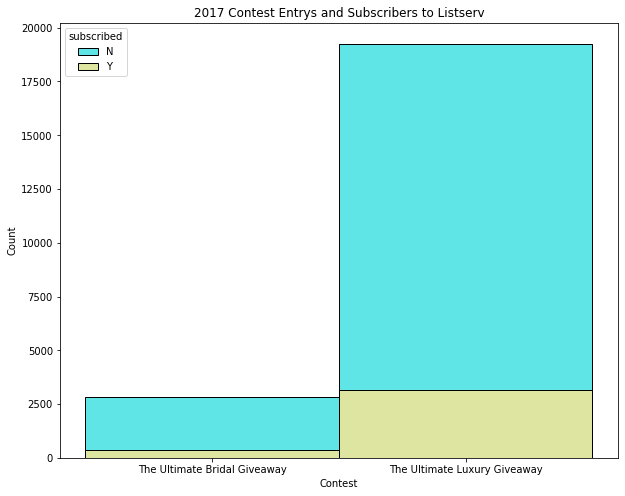

In [49]:
plt.figure(figsize=(10,8))
sns.histplot(x='Contest', hue='subscribed', data=contest17, multiple='stack', palette='rainbow')
plt.title('2017 Contest Entrys and Subscribers to Listserv')
plt.show()

In [50]:
(contest17.groupby('Contest')['subscribed']
 .value_counts()/contest17.groupby('Contest')['subscribed']
 .count()*100)

Contest                       subscribed
The Ultimate Bridal Giveaway  N             86.39576
                              Y             13.60424
The Ultimate Luxury Giveaway  N             83.73397
                              Y             16.26603
Name: subscribed, dtype: float64

In [51]:
contest17=contest17.merge(sub[['Email Address', 'OPTIN_TIME']], how='left')
contest17[['Created At', 'OPTIN_TIME']]=contest17[['Created At', 'OPTIN_TIME']].apply(pd.to_datetime)
contest17['time_to_sub']=(contest17['OPTIN_TIME']-contest17['Created At']).dt.days

In [52]:
len(contest17[contest17['time_to_sub']<0])

6